<a href="https://colab.research.google.com/github/Rasamps/drug-misuse/blob/master/cluster_kproto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install the kmodes library. This will let us access the K-Prototypes algorithm.

In [1]:
!pip install kmodes

Begin by importing the dataset and properly processing it.
This attempt will use the five scores traits as well as the Amphetamine and Benzos feature.

In [3]:
import pandas as pd
#Load all the data and then filter for which features we want to use.
df = pd.read_csv('drug_cons_data.csv', header = 0)
df = df.filter(items = ['Ascore','Cscore','Escore','Nscore','Oscore','Amph','Benz'])
print(df.head())
print(df.columns)

    Ascore   Cscore   Escore   Nscore   Oscore Amph Benz
0 -0.91699 -0.00665 -0.57545  0.31287 -0.58331  CL2  CL2
1  0.76096 -0.14277  1.93886 -0.67825  1.43533  CL2  CL0
2 -1.62090 -1.01450  0.80523 -0.46725 -0.84732  CL0  CL0
3  0.59042  0.58489 -0.80615 -0.14882 -0.01928  CL0  CL3
4 -0.30172  1.30612 -1.63340  0.73545 -0.45174  CL1  CL0
Index(['Ascore', 'Cscore', 'Escore', 'Nscore', 'Oscore', 'Amph', 'Benz'], dtype='object')


Import the K-Prototypes algorithm and run it on our reduced dataset.

In [0]:
import kmodes
from kmodes import kprototypes
def do_kproto(num_clusters, drugs):
  kproto = kprototypes.KPrototypes(n_clusters = num_clusters, n_init = 1, init = 'Cao', verbose = 1)
  kproto.fit_predict(drugs, categorical = [5,6])
  cost = kproto.cost_
  return cost

Use the elbow method to select the optimal number of clusters.

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 450, ncost: 8537.027726219558
Run: 1, iteration: 2/100, moves: 351, ncost: 8111.058235941895
Run: 1, iteration: 3/100, moves: 169, ncost: 8018.775449156822
Run: 1, iteration: 4/100, moves: 55, ncost: 8009.311582564009
Run: 1, iteration: 5/100, moves: 20, ncost: 8007.933140086872
Run: 1, iteration: 6/100, moves: 7, ncost: 8007.702690555863
Run: 1, iteration: 7/100, moves: 3, ncost: 8007.658860712849
Run: 1, iteration: 8/100, moves: 1, ncost: 8007.640289267341
Run: 1, iteration: 9/100, moves: 0, ncost: 8007.640289267341
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 554, ncost: 7337.9186725402615
Run: 1, iteration: 2/100, moves: 233, ncost: 7220.190261465652
Run: 1, iteration: 3/100, moves: 77, ncost: 7205.97025852436
Run: 1, iteration: 4/100, moves: 55, ncost: 7200.321004801081
Run: 1, iteration: 5/100, moves: 

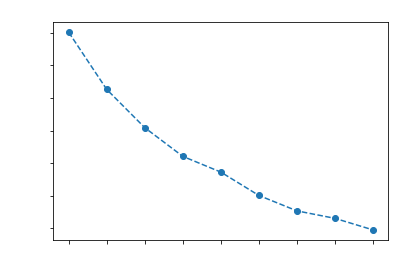

In [5]:
import matplotlib.pyplot as plt

scores = []
nums = []

for i in range(2,11):
  scores.append(do_kproto(i,df))
  nums.append(i)

plt.title('Clustering Score based on the Number of Clusters used', c = 'w')
plt.plot(nums, scores, marker = 'o', linestyle = 'dashed')
plt.xlabel('Number of Clusters', c ='w')
plt.xticks(c = 'w')
plt.ylabel('Clustering Score', c ='w')
plt.yticks(c = 'w')

plt.show()

Based on these results, one would be quick to choose 5 clusters. But from the results obtained during the PCA experiment, 4 clusters should be kept in mind.

We will do a deeper dive into both number of clusters.

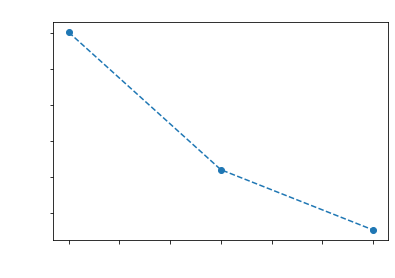

In [6]:
final_num_clusters = [2, 5, 8]
final_scores = []

for nums in final_num_clusters:
  kproto = kprototypes.KPrototypes(n_clusters = nums, max_iter = 100, init = 'Cao')
  kproto.fit_predict(df, categorical = [5, 6])
  cost = kproto.cost_
  final_scores.append(cost)

plt.title('Clustering Score for 4 & 5 Clusters', c = 'w')
plt.plot(final_num_clusters, final_scores, marker = 'o', linestyle = 'dashed')
plt.xlabel('Number of Clusters', c ='w')
plt.xticks(c = 'w')
plt.ylabel('Clustering Score', c ='w')
plt.yticks(c = 'w')

plt.show()

Here we see it may be worthwhile to use 5 clusters over 5 based on the difference in scoring.

In [7]:
import numpy as np

final_kproto = kprototypes.KPrototypes(n_clusters = 2, max_iter = 200, init = 'Cao', n_init = 30,
                                       verbose = 1)

final_kproto.fit_predict(df, categorical = [5, 6])
print("The clustering score incurred is:", final_kproto.cost_)

labels = pd.DataFrame(final_kproto.labels_, columns = ['Cluster'])
num_labels = np.unique(final_kproto.labels_) #Gives the unique labels....
print("The unique labels are: ", num_labels)

data_with_labels = pd.concat((df,labels), axis = 1)

print(data_with_labels.head())

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/200, moves: 337, ncost: 8209.673798608517
Run: 1, iteration: 2/200, moves: 201, ncost: 8043.873515739995
Run: 1, iteration: 3/200, moves: 100, ncost: 8010.750788643922
Run: 1, iteration: 4/200, moves: 29, ncost: 8007.771642949744
Run: 1, iteration: 5/200, moves: 6, ncost: 8007.499072298907
Run: 1, iteration: 6/200, moves: 3, ncost: 8007.431787384216
Run: 1, iteration: 7/200, moves: 0, ncost: 8007.431787384216
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/200, moves: 290, ncost: 8180.953516771047
Run: 2, iteration: 2/200, moves: 214, ncost: 8033.908143192397
Run: 2, iteration: 3/200, moves: 78, ncost: 8011.837813675408
Run: 2, iteration: 4/200, moves: 28, ncost: 8008.982329703958
Run: 2, iteration: 5/200, moves: 17, ncost: 8007.902617820089
Run: 2, iteration: 6/200, moves: 7, ncost: 8007.702690555862
Run: 2, iteration: 7/200, moves: 

With the cluster labels appended to the data we can perform an analysis on the clustering through visualizations.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


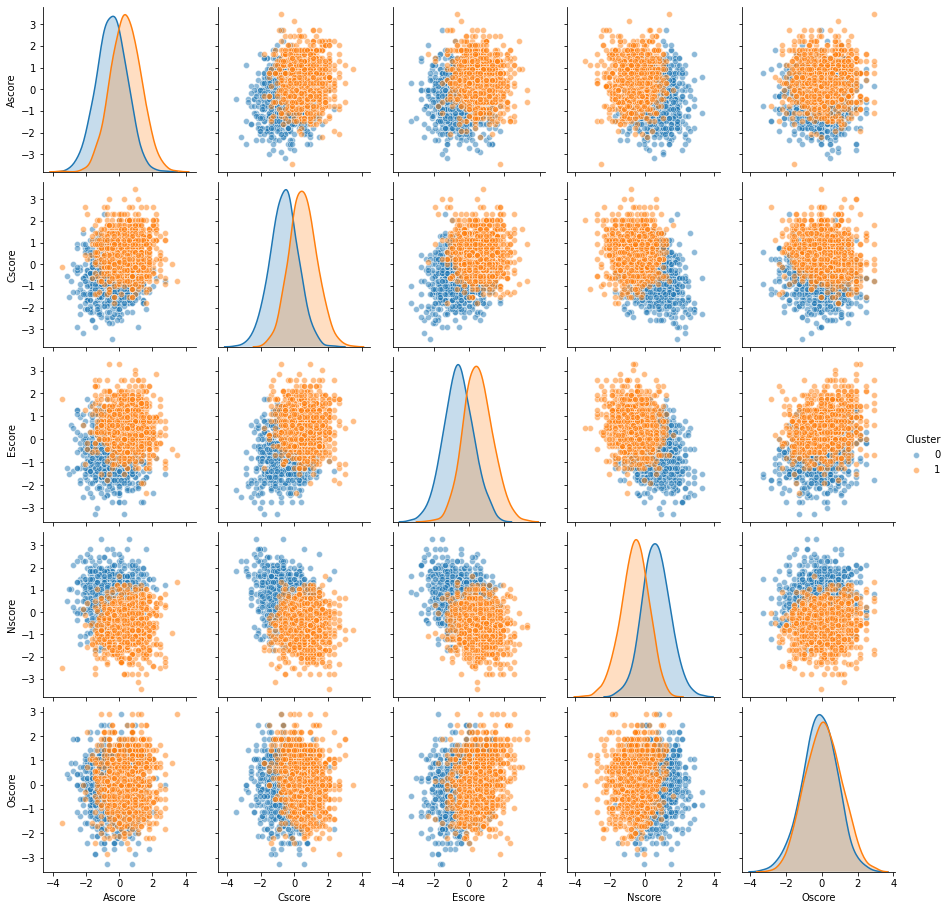

In [8]:
import seaborn as sns

sns.pairplot(data_with_labels, hue = 'Cluster', plot_kws={'alpha': 0.5})

From these plots, we can see there are pairs of the personality score features which do a good job of capturing the effect of the clustering algorithm as well as others which do not.

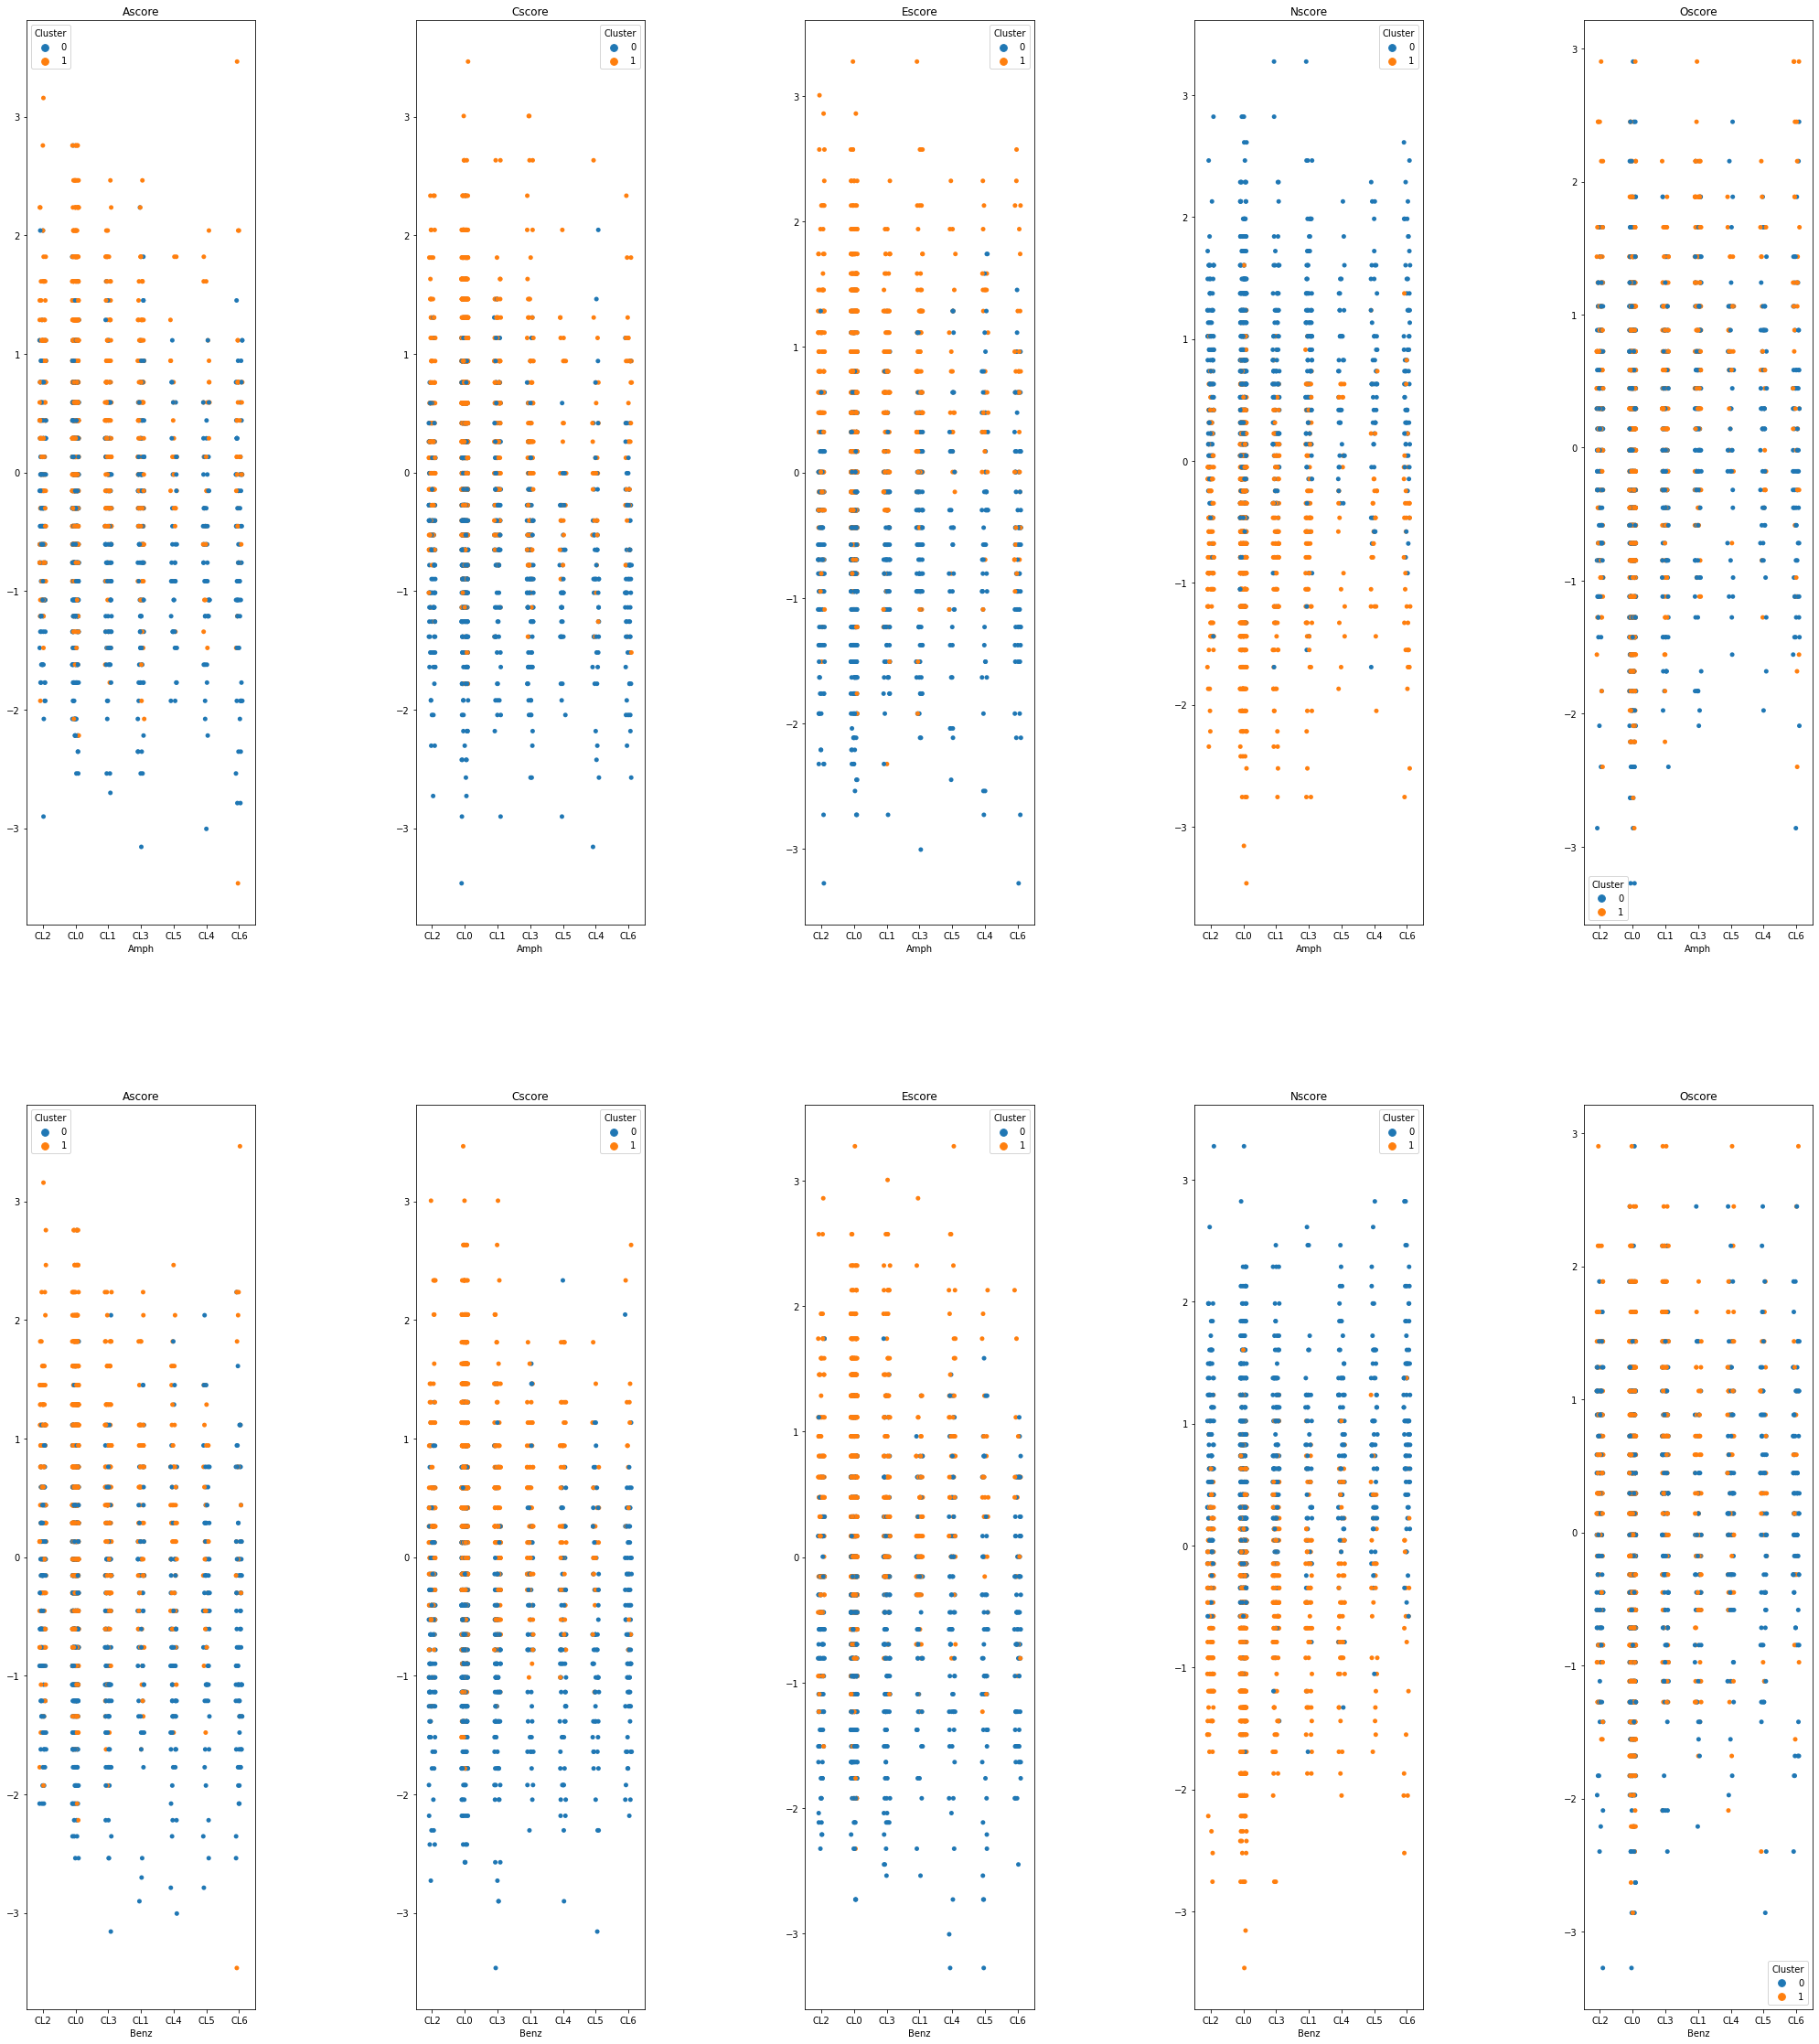

In [9]:
columns = ['Ascore','Cscore','Escore','Nscore','Oscore','Ascore','Cscore','Escore','Nscore','Oscore']
f, axes = plt.subplots(2, 5, figsize=(35, 40), sharex = False)

f.subplots_adjust(hspace=0.2, wspace=0.7) 
plot_index = 0
for col in columns:
  if plot_index < 5:
    ax = sns.stripplot(x = data_with_labels['Amph'], y = data_with_labels[col].values,
                        hue = data_with_labels['Cluster'], jitter = True, ax = axes[0,(plot_index)])
    ax.set_title(col)
  elif plot_index >= 5:
    ax = sns.stripplot(x = data_with_labels['Benz'], y = data_with_labels[col].values,
                       hue = data_with_labels['Cluster'], jitter = True, ax = axes[1,(plot_index-5)])
    ax.set_title(col)
  plot_index += 1

We can start to formulate an analysis based on the clustering results...

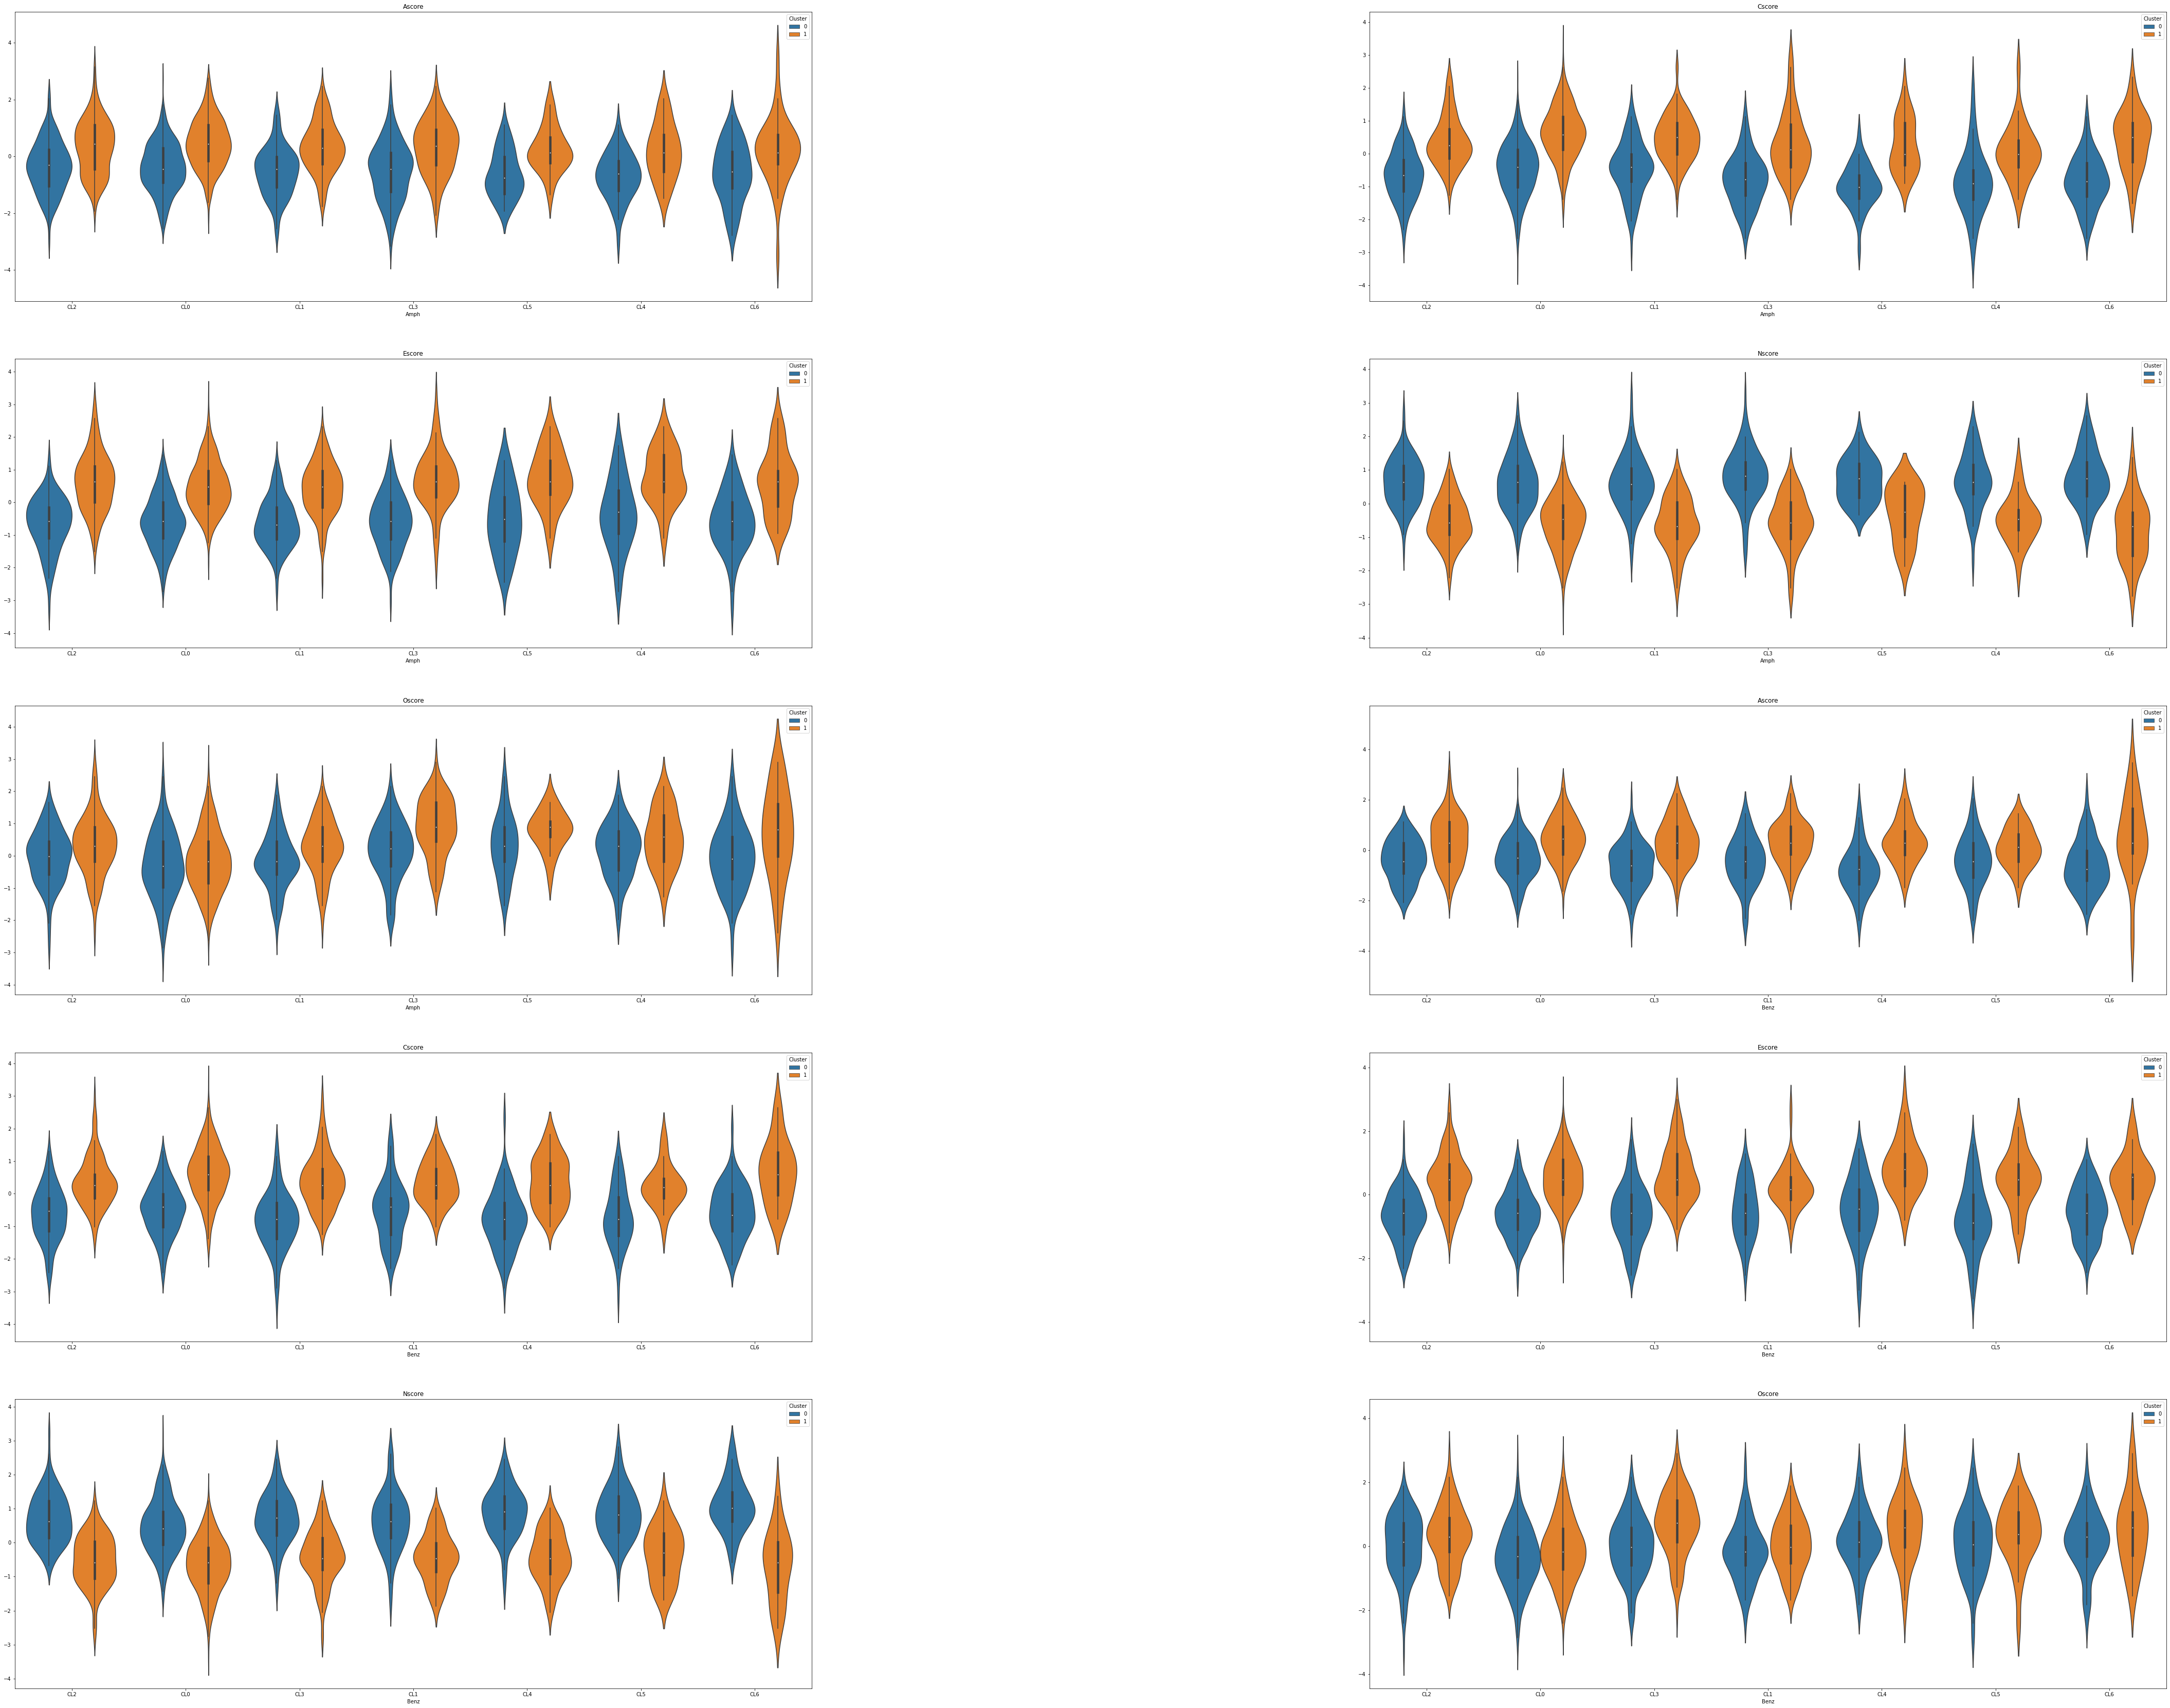

In [10]:
columns = ['Ascore','Cscore','Escore','Nscore','Oscore','Ascore','Cscore','Escore','Nscore','Oscore']
f, axes = plt.subplots(5, 2, figsize=(75, 60), sharex = False) 

f.subplots_adjust(hspace=0.2, wspace=0.7) 
plot_index = 0
for col in columns:
  if plot_index < 2:
    ax = sns.violinplot(x = data_with_labels['Amph'], y = data_with_labels[col].values,
                        hue = data_with_labels['Cluster'], ax = axes[0,(plot_index)])
    ax.set_title(col)
  elif plot_index >= 2 and plot_index < 4:
    ax = sns.violinplot(x = data_with_labels['Amph'], y = data_with_labels[col].values,
                       hue = data_with_labels['Cluster'], ax = axes[1,(plot_index-2)])
    ax.set_title(col)
  elif plot_index == 4:
    ax = sns.violinplot(x = data_with_labels['Amph'], y = data_with_labels[col].values,
                       hue = data_with_labels['Cluster'], ax = axes[2,(plot_index-4)])
    ax.set_title(col)
  elif plot_index == 5:
    ax = sns.violinplot(x = data_with_labels['Benz'], y = data_with_labels[col].values,
                       hue = data_with_labels['Cluster'], ax = axes[2,(plot_index-4)])
    ax.set_title(col)
  elif plot_index >= 6 and plot_index < 8:
    ax = sns.violinplot(x = data_with_labels['Benz'], y = data_with_labels[col].values,
                       hue = data_with_labels['Cluster'], ax = axes[3,(plot_index-6)])
    ax.set_title(col)
  elif plot_index >= 8 and plot_index < 10:
    ax = sns.violinplot(x = data_with_labels['Benz'], y = data_with_labels[col].values,
                       hue = data_with_labels['Cluster'], ax = axes[4,(plot_index-8)])
    ax.set_title(col)
  plot_index += 1

Lastly, we can use PCA to bring the dimensionality down to a 2D or 3D problem and see how the clusters work when we try and retain a large part of the variance.

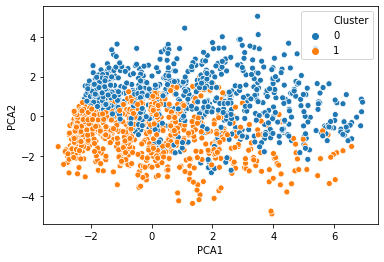

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

le = LabelEncoder()
pca2D = PCA(n_components = 2)

encoded_data = data_with_labels

cols = ['Amph','Benz']

for col in cols:
  encoded_data[col] = le.fit_transform(encoded_data[col])

clusters = encoded_data.filter(items = ['Cluster'])

cluster_2D_results = pca2D.fit_transform(encoded_data.drop(columns = ['Cluster']))
data_to_plot = pd.DataFrame(data= cluster_2D_results, columns = ['PCA1','PCA2'])
data_to_plot = pd.concat((data_to_plot,clusters),axis = 1)

sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'Cluster', data = data_to_plot)